In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [2]:
from distributed import Client, LocalCluster
from dask import dataframe

cluster = LocalCluster()
client = Client(cluster)

In [3]:
client

Client Scheduler: tcp://127.0.0.1:42507 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 8 Cores: 32 Memory: 206.16 GB


In [4]:
import dask.dataframe as dd

network = pd.read_csv('/gpfs_home/spate116/data/spate116/GCN/E116/GM12878_GRN.tsv', sep='\t', header=0, names=['TF', 'target', 'importance'])
network.head()

,TF,target,importance
0,HLA-DPA2,ZSWIM2,94.050917
1,CEACAMP10,CDKL4,89.106253
2,FMR1NB,SNCA,87.022851
3,SLC6A15,FAT4,86.621930
4,SERPINB5,MRPS17P9,85.903397


In [5]:
gene_set = list(set(network['target'].to_list()))

In [6]:
len(gene_set)

21454

In [7]:
def top_targets(num, target):
    return network[network['target'] == target][0:num]

def top_std(z_score, target):
    curr = network[network['target'] == target]
    imp = curr['importance'].to_numpy()
    imp = stats.zscore(imp)
    return curr[imp >= z_score]

In [8]:
import dask.bag as db

split = db.from_sequence(gene_set, npartitions=31)

In [ ]:
connections = split.map(lambda x: [x, top_std(1, x)])
result_network = connections.compute()

In [ ]:
np.save('/gpfs_home/spate116/data/spate116/GCN/E116/GM12878_GRN_1_STD', result_network)
sparcity = list(map(lambda x: x[1].shape[0], result_network))
sns.distplot(sparcity, kde=False)

In [10]:
connections_2 = split.map(lambda x: [x, top_std(2, x)])
result_network_2 = connections_2.compute()
np.save('/gpfs_home/spate116/data/spate116/GCN/HEPG2_GRN_2_STD', result_network_2)

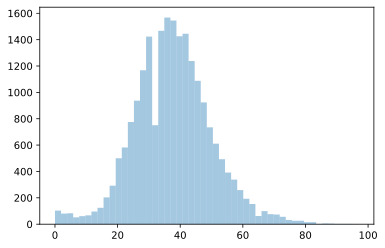

In [11]:
sparcity = list(map(lambda x: x[1].shape[0], result_network_2))
sns.distplot(sparcity, kde=False)